<a href="https://colab.research.google.com/github/Jorgemontanez25/machine-learning-python-template/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Que caracteristicas influyen en el precio de un ABnB?**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
print(dataframe.shape)
print(dataframe.info())
dataframe.head()


(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
dataframe.to_csv("dataframe_raw.csv",index=False)

In [34]:
dataframe.to_csv("../data/raw/dataframe.csv", index = False)

OSError: Cannot save file into a non-existent directory: '../data/raw'

In [ ]:
null_reviews=dataframe['reviews_per_month'].isna().sum()
print(null_reviews)
print((null_reviews/len(dataframe))*100)

10052
20.55833929849678


**Observaciones**


*   Contamos con 48895 ABnB en la base de datos, con 16 variables, de las cuales 11 son variable independientes o predictorias, 4 son variables de identificacion y 1 seria la variable dependiente o a predecir, la cual seria la variable precio.
*   Se presenan 16 y 21 datos nulos en las variables name y host_name, lo cual lo considerare irrelevante ya que contamos con las variables ID y host_id con valores completos.
*   Las varibles last_review y review_per_month cuentan con 10,052 datos nulos, teniendo un 20.55% de datos nulos.
*   El dataser tiene 7 variables categoricas (Id,name,host_id,host_name,neighbourhood_group,neighbourhood, room_type) y 9 variables numericas (latitude, longitude, price, minumum_nights, number_of_reviews,last_review, review_per_month,	calculated_host_listings_count, availability_365)





**Verificacion de datos duplicados**

In [ ]:
duplicate= dataframe['id'].duplicated().sum()
duplicate


0

**NOTA**: para los datos duplicados se considera unicamente el ID ya que el ID es la mannera mas directa de verificar si dentro del dataset existen ABnB repetidos.

**Data cleaning**

Limpieza de datos, eliminando las variables que se consideren irrelevantes o redundantes dentro del dataset.
*   Para el analisis de la variable precio datos como el Id,name, host_id, host_name, me parecen irrelevantes para la determinacion del precio.
*   Las variables de latitude y longitude de igual manera me parecen irrelevantes ya que contamos con las variables neighbourhood, por lo cual me parecen redundantes.
*   Las variables last_review y reviews_per_month tienen una gran cantidad de datos nulos, y al tener las dos la misma cantidad de datos nulos eliminare la variable last_review, ya que es la que se me hace una variable menos relevante de las dos, aunque ambas variables tienen gran numero de valores nulos quisiera coroborar que si tiene alguna relevancia para la variable a predecir "price", o si es meramente redundante con la variable number_of_reviews, ya que una nos menciona las reviews poe mes y la otra las reviews totales por el año.






In [ ]:
dataframe.drop(['id','name','host_id','host_name','latitude','longitude','last_review'], axis=1,inplace=True)
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(48895, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB
None


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


**Analisis univariable**

*Variables Categoricas*

**Room Type**

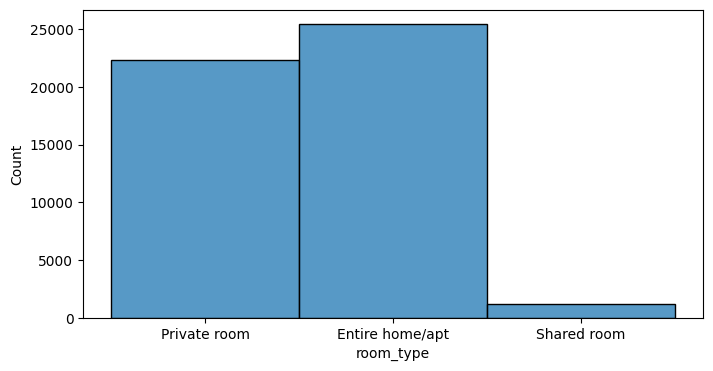

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=dataframe,x="room_type")
plt.show()

Podemos observar en el histograma que tipo de cuarto con con mayor numero de oferta por parte de ABnB en la zona de New York es el de casa completa, seguido por cuarto privado y muy por debajo de las dos primeras opciones mencionadas se encuentra el cuarto compartido.

**Neighbourhood Group**


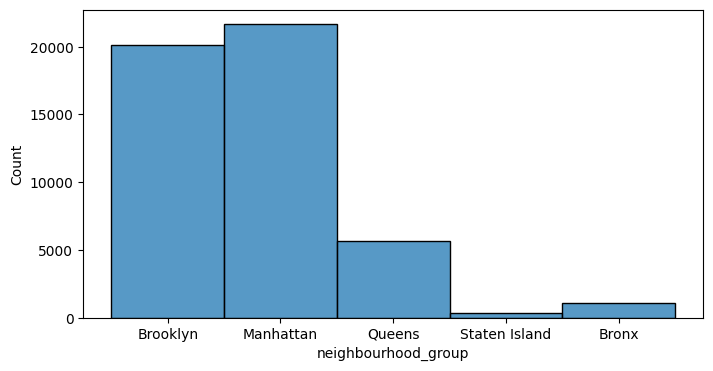

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=dataframe,x="neighbourhood_group")
plt.show()

Por parte del Neighbourhod group, podemos observar que la mayoria de los ABnB se concentran en Manhattan y Brooklyn, siendo el primero donde mas oferta de ABnB podemos encontrar, despues nos encontramos con Queens, Bronx y State Island siendo este ultimo el que tiene el  menor oferta de ABnB.

**Neighbourhood**

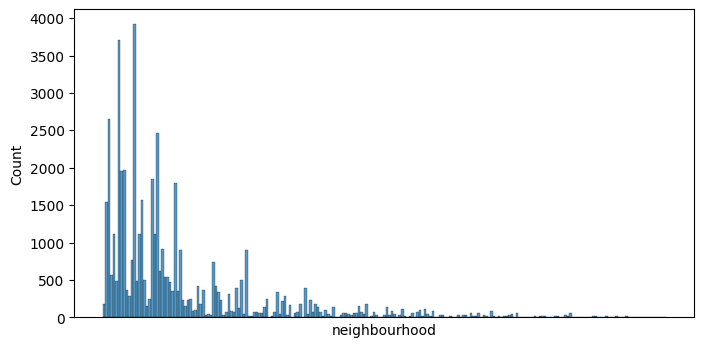

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=dataframe,x="neighbourhood").set_xticks([])
plt.show()

In [ ]:
print(dataframe['neighbourhood'].nunique())
print(dataframe['neighbourhood'].mode())

#Lets find how many neighbourhoods have more than 500
n_neighbourhood = dataframe['neighbourhood'].value_counts()
contador = 0
for value in n_neighbourhood:
    if value > 500:
        contador += 1
print("Número de vecindarios con más de 500:", contador)
print(contador/221*100)

221
0    Williamsburg
Name: neighbourhood, dtype: object
Número de vecindarios con más de 500: 23
10.407239819004525


En cuanto a Neighbourhood contamos con una cantidad de 221 neighbourhoods diferentes, haciendo casi imposible de leer un histograma de manera adecuada por la cantidad de datos, por lo cual si revisamos directamente la moda podemos observar que el neighbourhood con mayor oferta de ABnB es Williamsburg. De igual manera se puede observar que mas del 85% de los neighbourhoods cuentan con menos de 500 unidades.

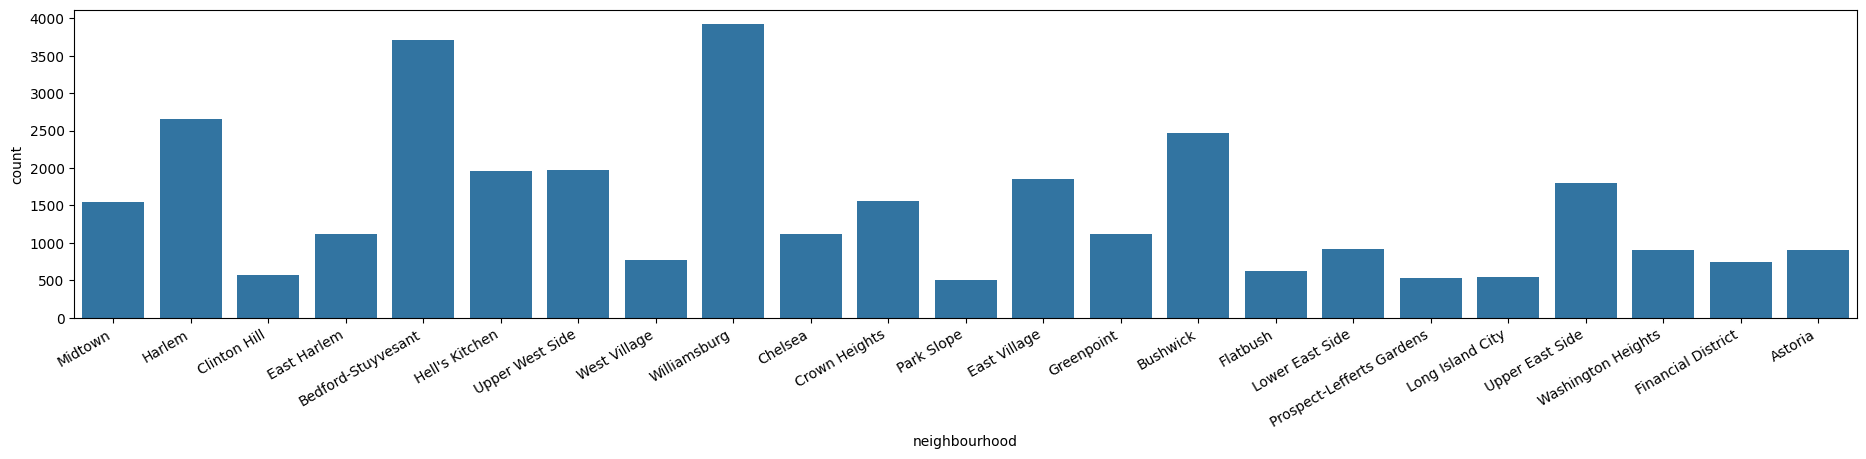

In [ ]:
ov_500=n_neighbourhood[n_neighbourhood>500].index
n_ov=dataframe[dataframe['neighbourhood'].isin(ov_500)]
plt.figure(figsize=(23,4))
sns.countplot(data=n_ov,x="neighbourhood")
plt.xticks(rotation=30, ha="right")
plt.show()


*Variables numericas*

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB


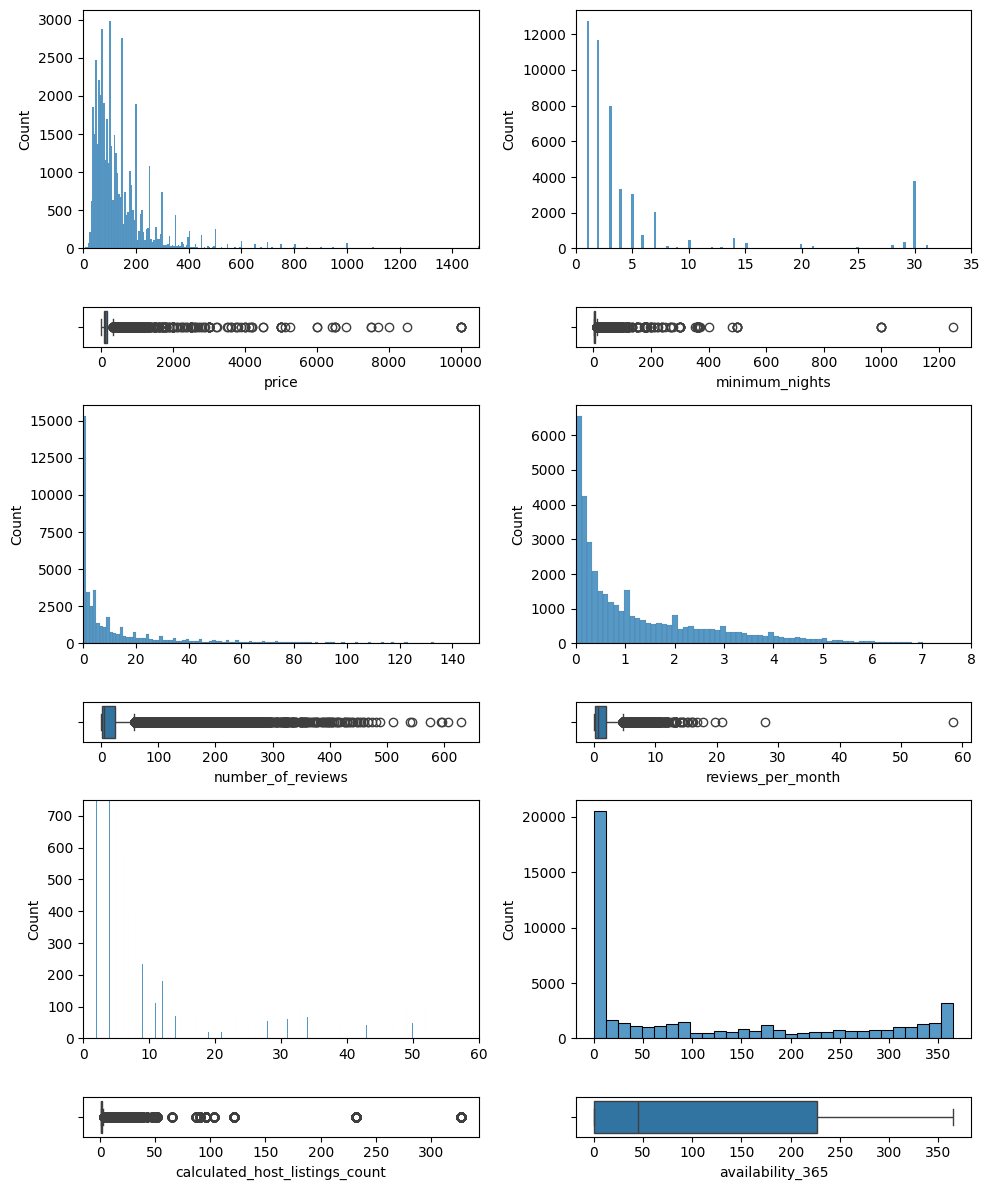

In [ ]:
fig, axis = plt.subplots(6, 2, figsize=(10, 12), gridspec_kw={'height_ratios':[6,1,6,1,6,1]})

sns.histplot(ax=axis[0,0], data=dataframe, x="price").set(xlabel=None)
axis[0,0].set_xlim(0,1500)
sns.boxplot(ax=axis[1,0], data=dataframe, x="price")

sns.histplot(ax=axis[0,1], data=dataframe, x="minimum_nights").set(xlabel=None)
axis[0,1].set_xlim(0,35)
sns.boxplot(ax=axis[1,1], data=dataframe, x="minimum_nights")

sns.histplot(ax=axis[2,0], data=dataframe, x="number_of_reviews").set(xlabel=None)
axis[2,0].set_xlim(0,150)
sns.boxplot(ax=axis[3,0], data=dataframe, x="number_of_reviews")

sns.histplot(ax=axis[2,1], data=dataframe, x="reviews_per_month").set(xlabel=None)
axis[2,1].set_xlim(0,8)
sns.boxplot(ax=axis[3,1], data=dataframe, x="reviews_per_month")

sns.histplot(ax=axis[4,0], data=dataframe, x="calculated_host_listings_count").set(xlabel=None)
axis[4,0].set_xlim(0,60)
axis[4,0].set_ylim(0,750)
sns.boxplot(ax=axis[5,0], data=dataframe, x="calculated_host_listings_count")

sns.histplot(ax=axis[4,1], data=dataframe, x="availability_365").set(xlabel=None)
sns.boxplot(ax=axis[5,1], data=dataframe, x="availability_365")

plt.tight_layout()
plt.show()



In [ ]:
print(dataframe['price'].mode())
print(dataframe['minimum_nights'].mode())
print(dataframe['availability_365'].mode())



0    100
Name: price, dtype: int64
0    1
Name: minimum_nights, dtype: int64
0    0
Name: availability_365, dtype: int64



Despues del analisis de las variables numericas del dataset, podemos concluir lo siguiente:


* El prrecio que mas se repite entre los Abnb es de $100 con aproximadamente 3000 tipos de cuarto con ese valor.
* En el minimo de noches para quedarse en el Abnb podemos observar que el valor que mas se repite es el de 1 noche.
* En el numero de reviews al mes podemos observar que hay una gran cantidad de Abnb que cuentan con 0 reviews-
* Como consecuencia de lo observado con anterioridad tenemos una gran cantidade de Abnbs con 0 numeros de reviews.
* Como era de esperar, en la variable de calculated_host_listings_count encontramos la moda en 1, que quere decir, que la mayoria de los host cuentan solo con 1 propiedad.
* En la variable availability_365, encontramos que su moda se encuentra en 0, que nos indicaria que no tiene disponibilidad en un año natural de 365, en este punto podriamos concluir que por el tipo de giro del negocio, dicha cantidad que no cuenta con disponibilidad es debido a que son casas que se rentan anualmente.










**Analisis de varibles miltivariante**

*heatmap varibles numericas*

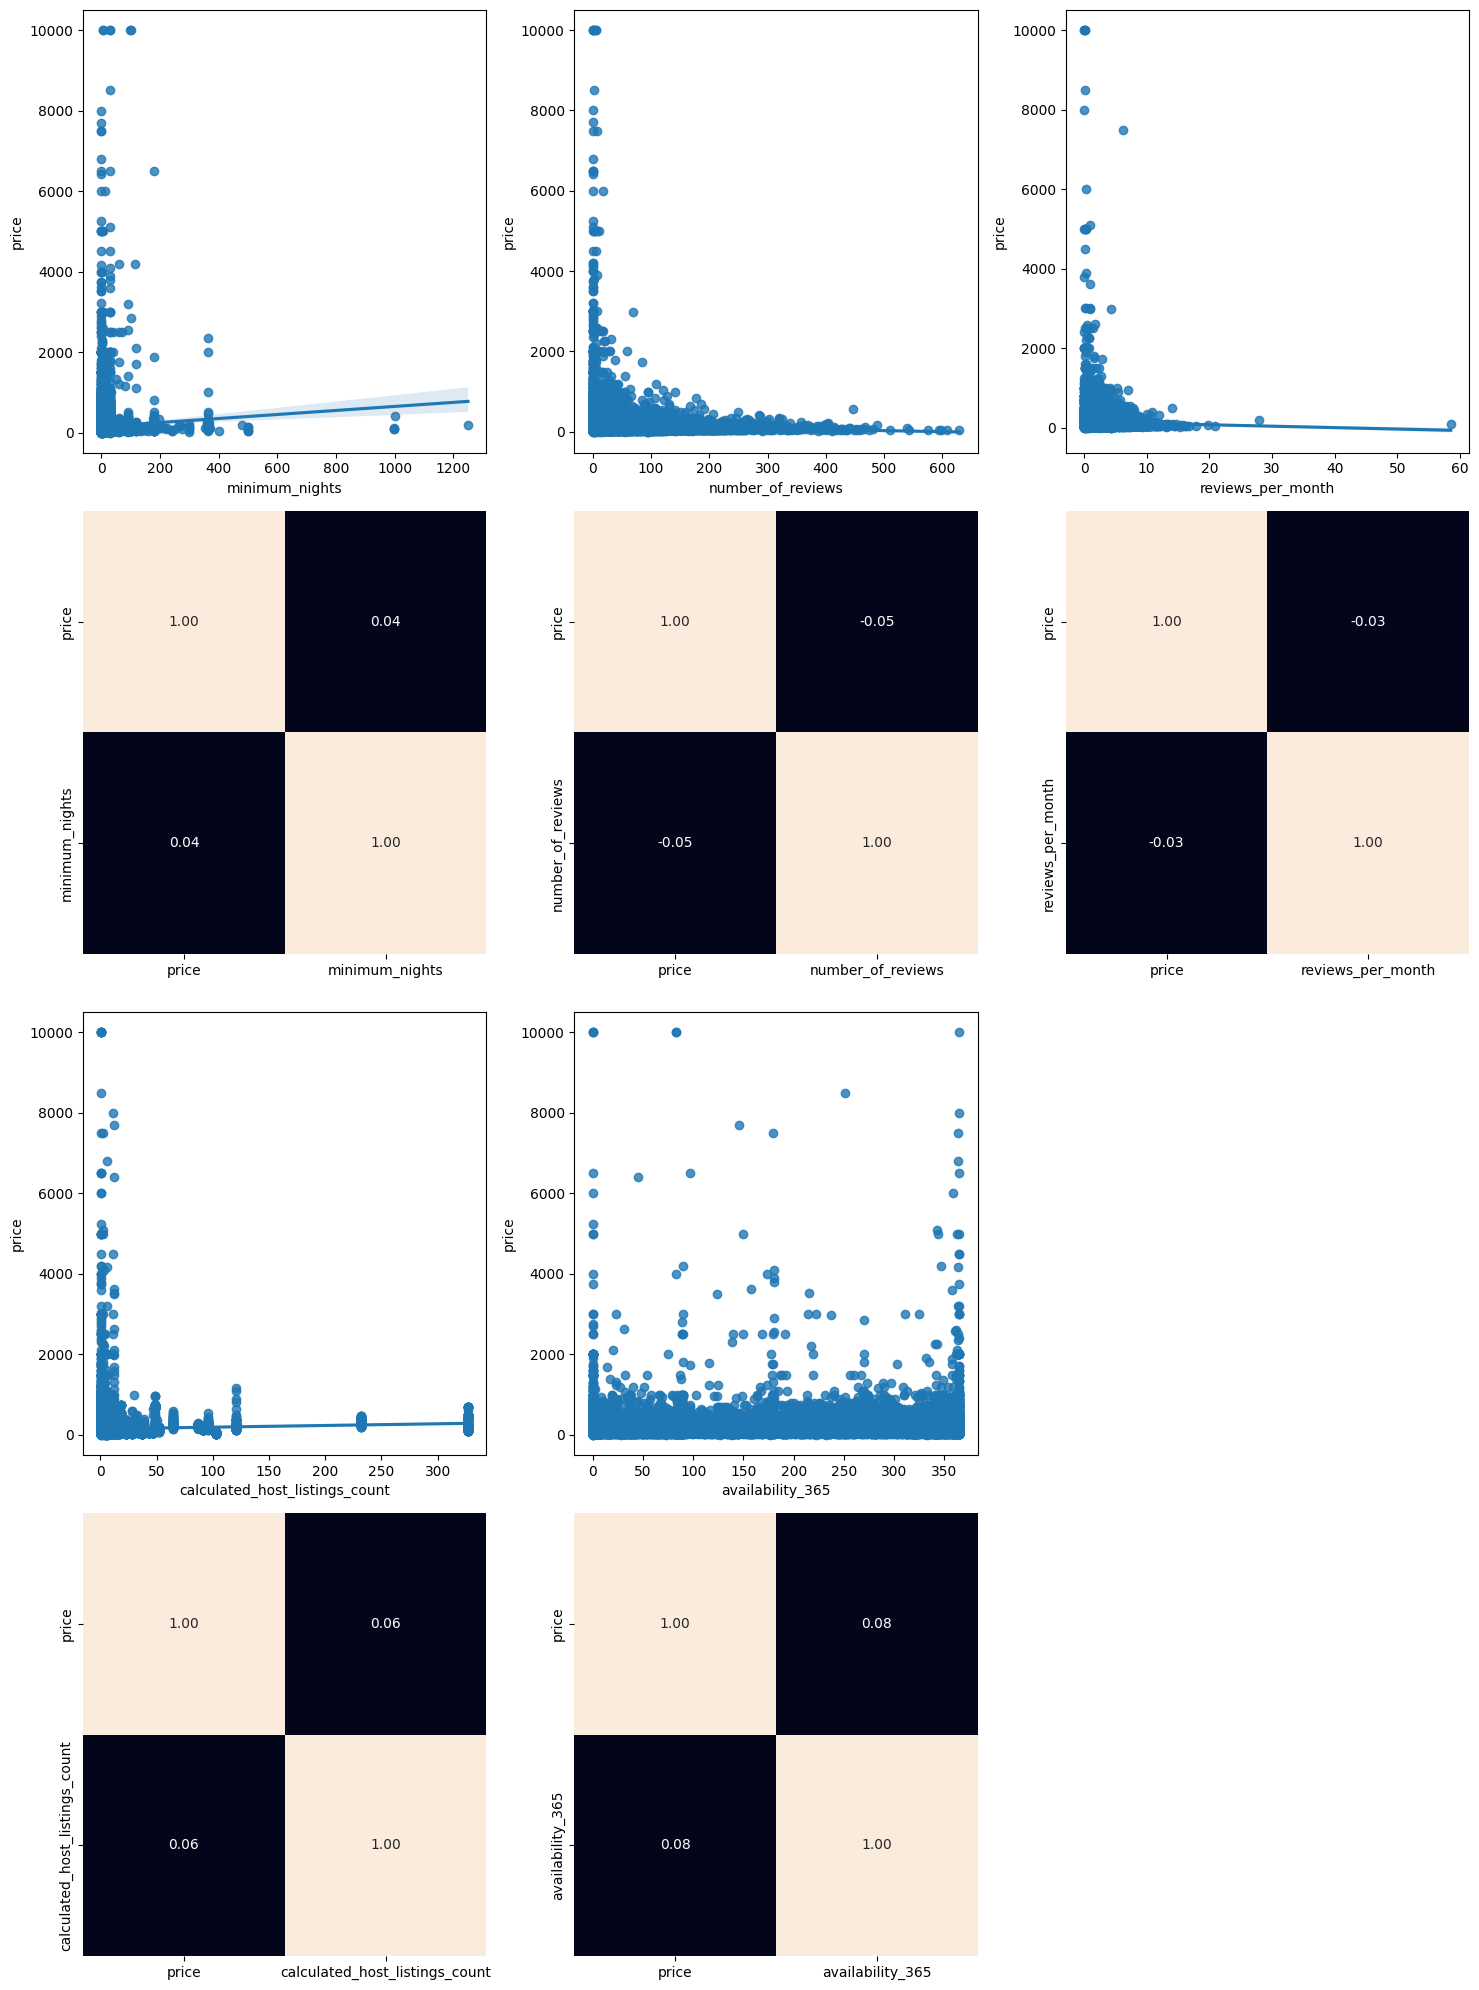

In [ ]:
fig, axis = plt.subplots(4, 3, figsize=(15, 20))

sns.regplot(ax=axis[0,0], data=dataframe, x="minimum_nights", y="price")
sns.heatmap(dataframe[['price','minimum_nights']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)

sns.regplot(ax=axis[0,1], data=dataframe, x="number_of_reviews", y="price")
sns.heatmap(dataframe[['price','number_of_reviews']].corr(), annot=True, fmt='.2f', ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[0,2], data=dataframe, x="reviews_per_month", y="price")
sns.heatmap(dataframe[['price','reviews_per_month']].corr(), annot=True, fmt='.2f', ax=axis[1,2], cbar=False)

sns.regplot(ax=axis[2,0], data=dataframe, x="calculated_host_listings_count", y="price")
sns.heatmap(dataframe[['price','calculated_host_listings_count']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)

sns.regplot(ax=axis[2,1], data=dataframe, x="availability_365", y="price")
sns.heatmap(dataframe[['price','availability_365']].corr(), annot=True, fmt='.2f', ax=axis[3,1], cbar=False)

plt.tight_layout()
fig.delaxes(axis[2,2])
fig.delaxes(axis[3,2])
plt.show()


Podemos concluir que entre las variables numericas del dataset no existe una relacion de peso o significancia con la variable dependiente "precio". De igual manera como se planteo en un principio se confirma la relevancia de la variable reviews_per_month, por lo que se procedera a eliminar esa variable.

In [ ]:
dataframe.drop(['reviews_per_month'], axis=1,inplace=True)
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(48895, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   number_of_reviews               48895 non-null  int64 
 6   calculated_host_listings_count  48895 non-null  int64 
 7   availability_365                48895 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.0+ MB
None


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


*Revisemos la relacion entre las mismas variables*

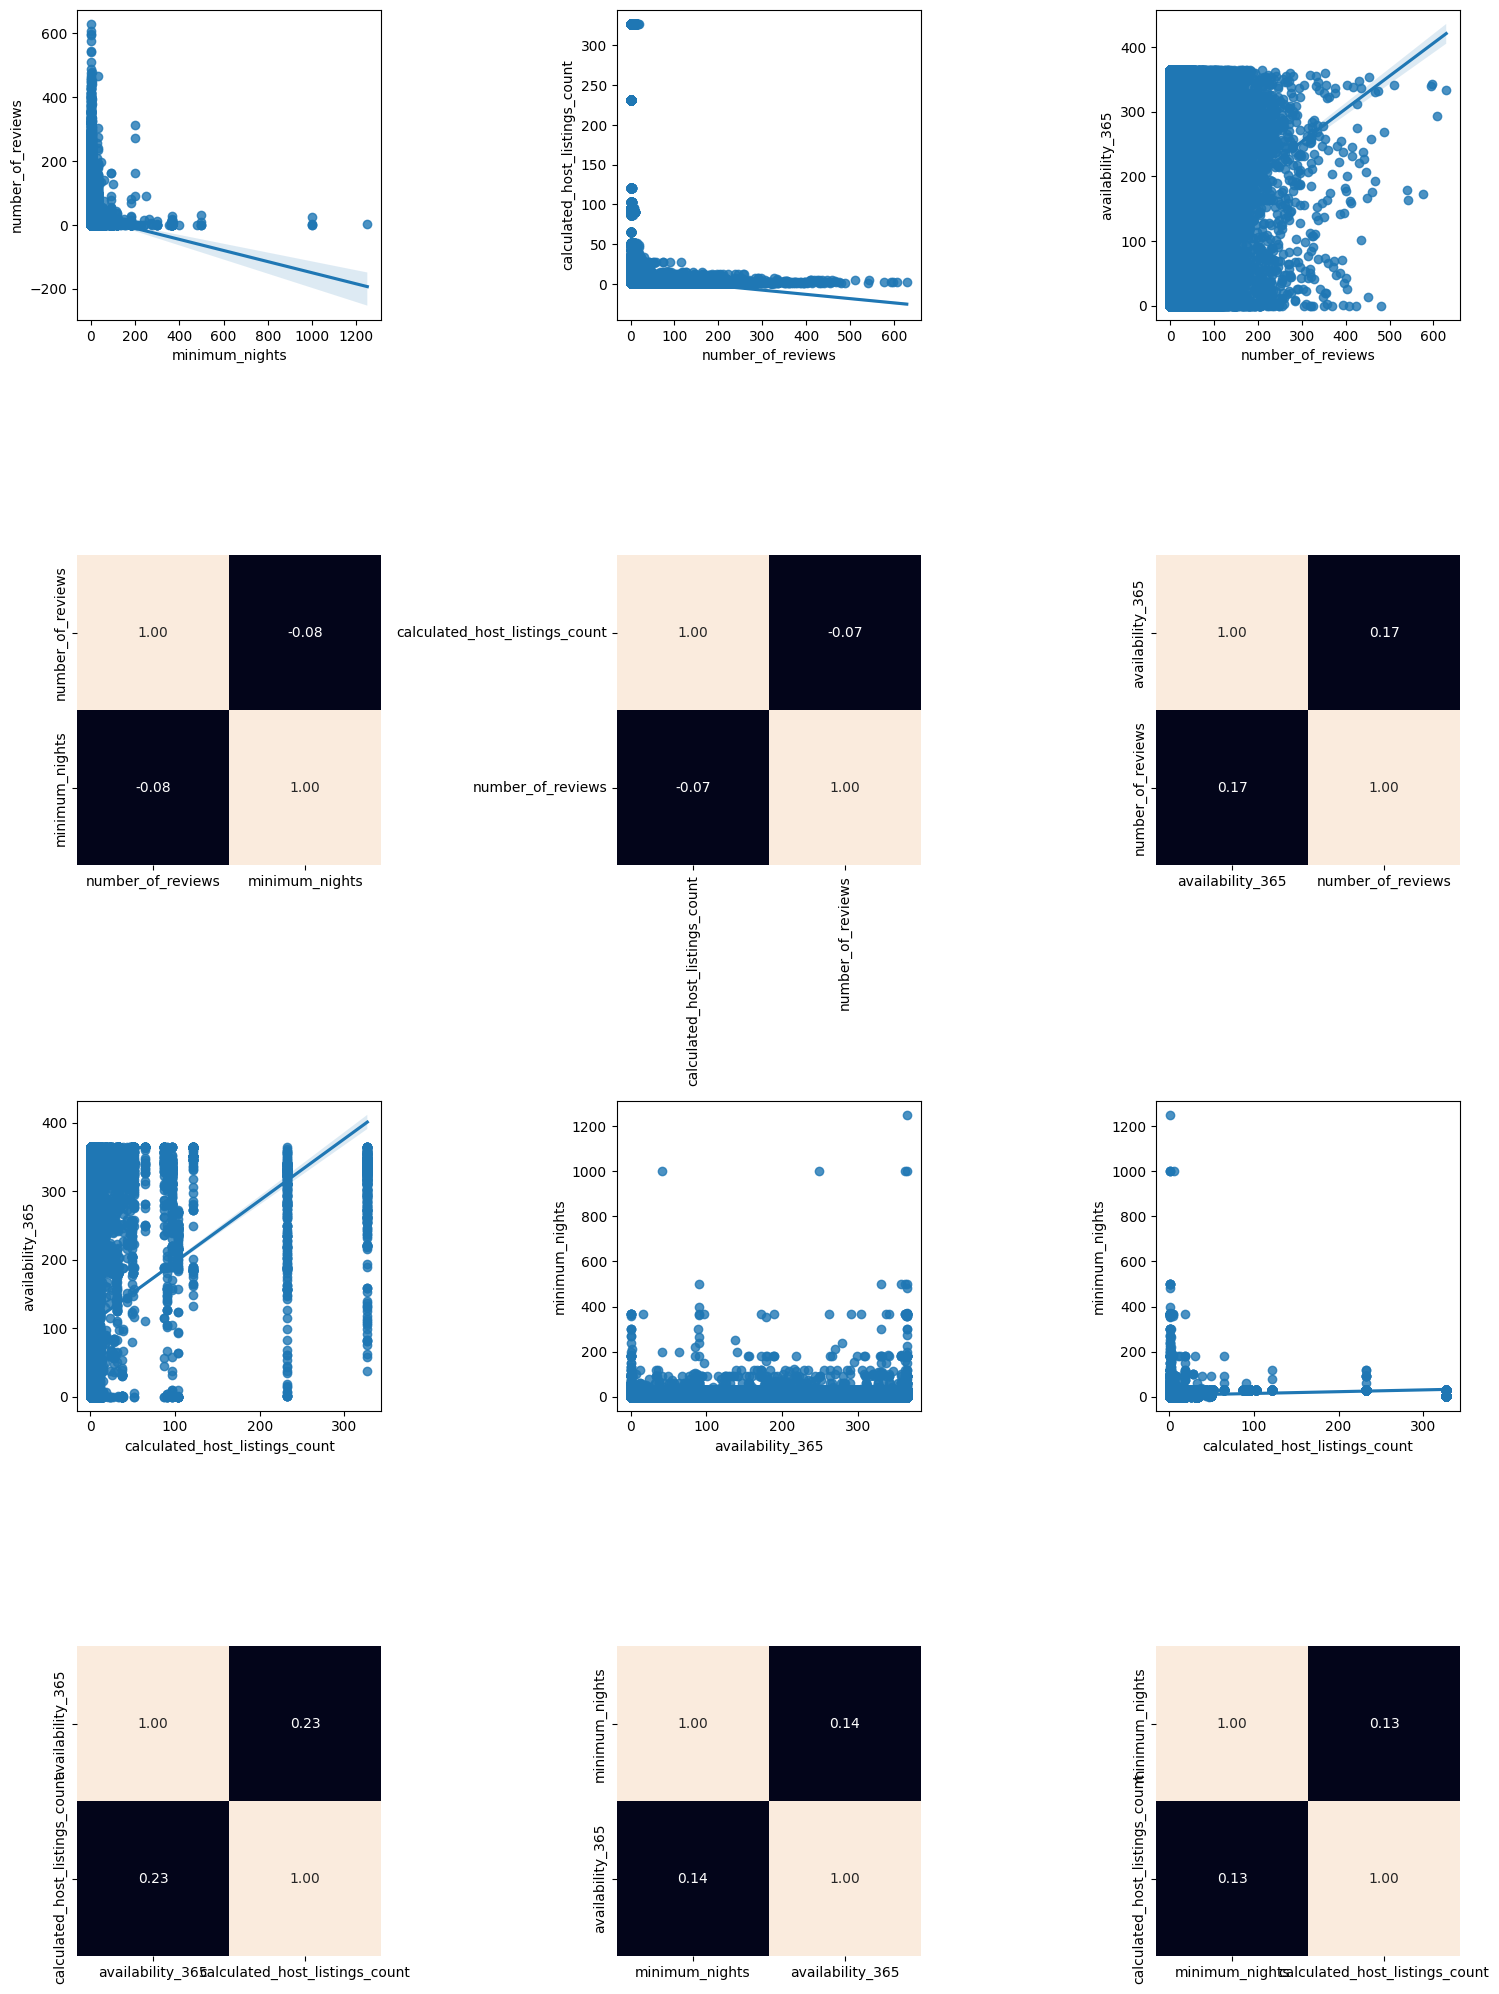

In [ ]:
fig, axis = plt.subplots(4, 3, figsize=(15, 20))

sns.regplot(ax=axis[0,0], data=dataframe, x="minimum_nights", y="number_of_reviews")
sns.heatmap(dataframe[['number_of_reviews','minimum_nights']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)

sns.regplot(ax=axis[0,1], data=dataframe, x="number_of_reviews", y="calculated_host_listings_count")
sns.heatmap(dataframe[['calculated_host_listings_count','number_of_reviews']].corr(), annot=True, fmt='.2f', ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[0,2], data=dataframe, x="number_of_reviews", y="availability_365")
sns.heatmap(dataframe[['availability_365','number_of_reviews']].corr(), annot=True, fmt='.2f', ax=axis[1,2], cbar=False)

sns.regplot(ax=axis[2,0], data=dataframe, x="calculated_host_listings_count", y="availability_365")
sns.heatmap(dataframe[['availability_365','calculated_host_listings_count']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)

sns.regplot(ax=axis[2,1], data=dataframe, x="availability_365", y="minimum_nights")
sns.heatmap(dataframe[["minimum_nights",'availability_365']].corr(), annot=True, fmt='.2f', ax=axis[3,1], cbar=False)

sns.regplot(ax=axis[2,2], data=dataframe, x="calculated_host_listings_count", y="minimum_nights")
sns.heatmap(dataframe[["minimum_nights",'calculated_host_listings_count']].corr(), annot=True, fmt='.2f', ax=axis[3,2], cbar=False)

plt.tight_layout()

plt.show()



Podemos observar que incluso entre las variables numericas no existe una relacion realmente de peso o grande, siendo la mayor de un 23% que se refiere a la disponibilidad vs numero de Abnb por host, lo cual tiene sentido ya que si un host tiene mas de una propiedad es mas probable que tenga mas dias disponibles de Abnb.

*Relacion entre variables categoricas*

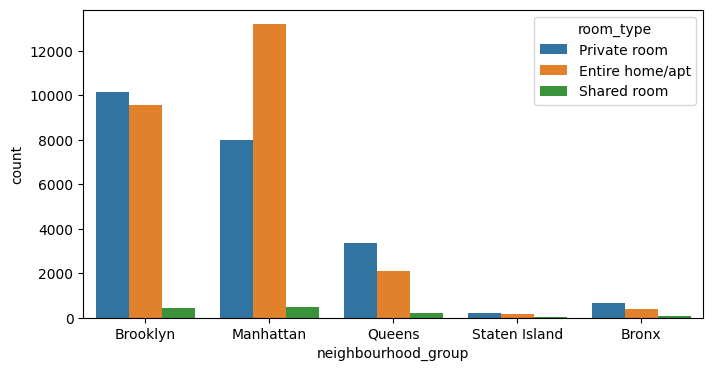

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=dataframe,x='neighbourhood_group',hue='room_type')
plt.show()

Como ya habiamos detectado previamente Manhattan tiene la mayor concentracion de Arbnb junto con Brooklyn, pero ahor apodemos observar que en Manhattan el tipo de cuarto que predomina es el de casa completa, caso diferente a Brooklyn en el cual el mas predominante es el cuarto privado, y de igual manera como habiamos detectado el tipo de cuarto con menor oferta es el cuarto compartido, y ahora podemos observar que en los 5 vecindarios counciden con esto.

*Relationship between Neighbourhood Group, Room Type, and Price*

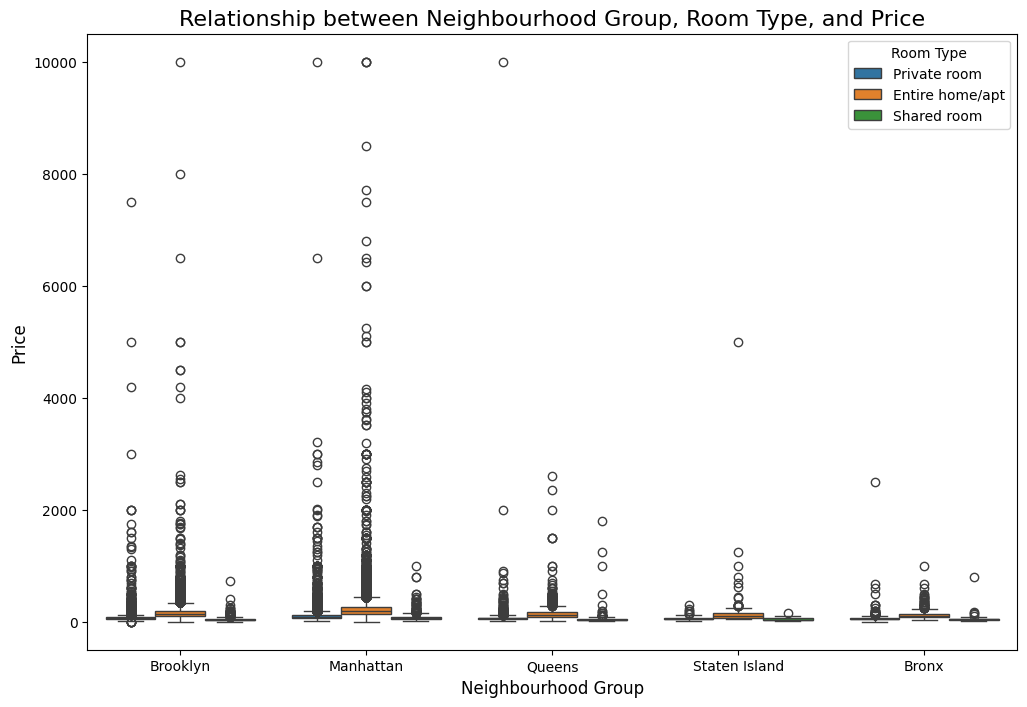

In [ ]:
plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.boxplot(data=dataframe, x='neighbourhood_group', y='price', hue='room_type')
plt.xlabel('Neighbourhood Group', fontsize=12)  # Etiqueta para el eje x
plt.ylabel('Price', fontsize=12)  # Etiqueta para el eje y
plt.title('Relationship between Neighbourhood Group, Room Type, and Price', fontsize=16)  # Título
plt.legend(title='Room Type', loc='upper right')  # Alinear la leyenda a la derecha
plt.show()


En esta grafica comparativa podemos observar la distribucion por vecindario no solo de tipo de cuarto si no igual del precio de los tipos de cuarto por cada uno, y podemos observar que en Brooklyn el tipo de cuarto con mayor precio es el cuarto privado, en Manhattan tanto el cuarto privado como casa completa cuentan con Abnb de precio alrededor a $10,000 pero con mayor cantidad de casas completas en ese rango, y por ultimo Queens igual cuenta con cuartos privados en ese mismo rango.

*Analisis de relacion de todas las variables*

In [35]:
dataframe.columns
dataframe2=dataframe.copy()

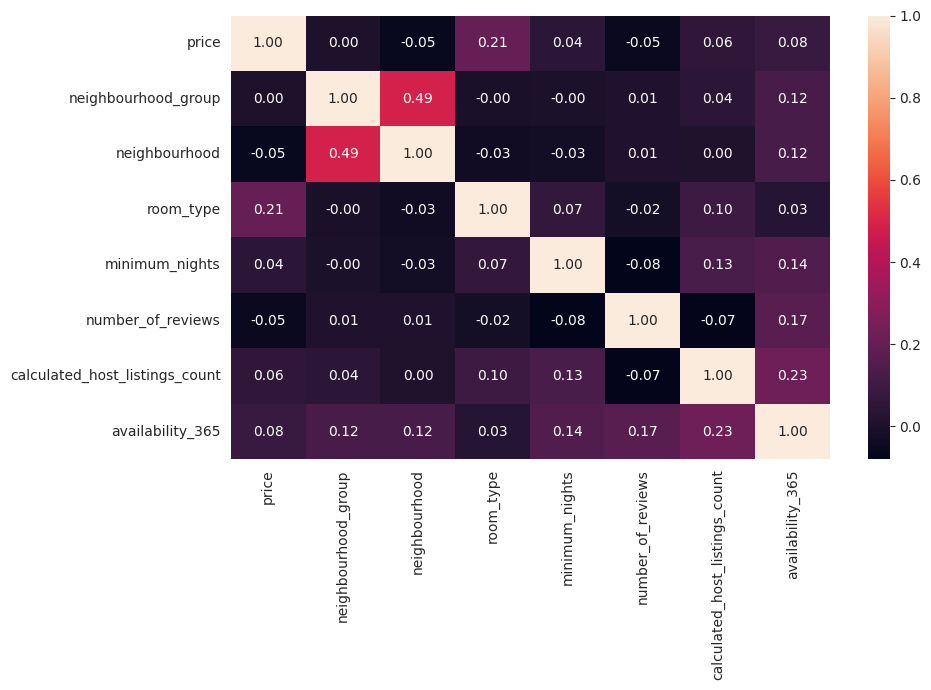

In [36]:
plt.figure(figsize=(10,7))

dataframe['neighbourhood_group'] = pd.factorize(dataframe['neighbourhood_group'])[0]
dataframe['room_type'] = pd.factorize(dataframe['room_type'])[0]
dataframe['neighbourhood'] = pd.factorize(dataframe['neighbourhood'])[0]

sns.heatmap(dataframe[['price','neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']].corr(), annot=True, fmt='.2f')

plt.tight_layout()

plt.show()

En el heatmap podemos observar lo siguiente:

*   Las variables con mayor relacion son neighbourhoo y neighbourhood_group que era de esperarse, ya que basicamente uno pertence al otro.
*   De igual manera encontramos una relacion del 21% entre el precio y el tipo de habitacion, lo cual tiene sentido ya que dependiendo del tipo de cuarto seria el costo que pagarias por noche, no es lo mismo una casa completa a una habitacion compartida.
*   Se observa una relacion del 23% entre disponibilidad de Abnb y numero de Abnb por host que igual era de esperarce  que ya habiamos detectado en analisis anteriores.
*   Tenemos una relcion del 12% entre neighbourhood/neighbourhoo_group con disponibilidad en el año, esto podria explicarse debido a la concentracion de oferta de Abnb en ciertos neighbourhoods.
*   Y por ultimo igual se encontro una relacion del 17% entre el numero de reviews y la disponibilidad de Abnb, aqui podria pensar que se da de manera qu eentre mas reviews tenga un Abnb mas demanda tendra


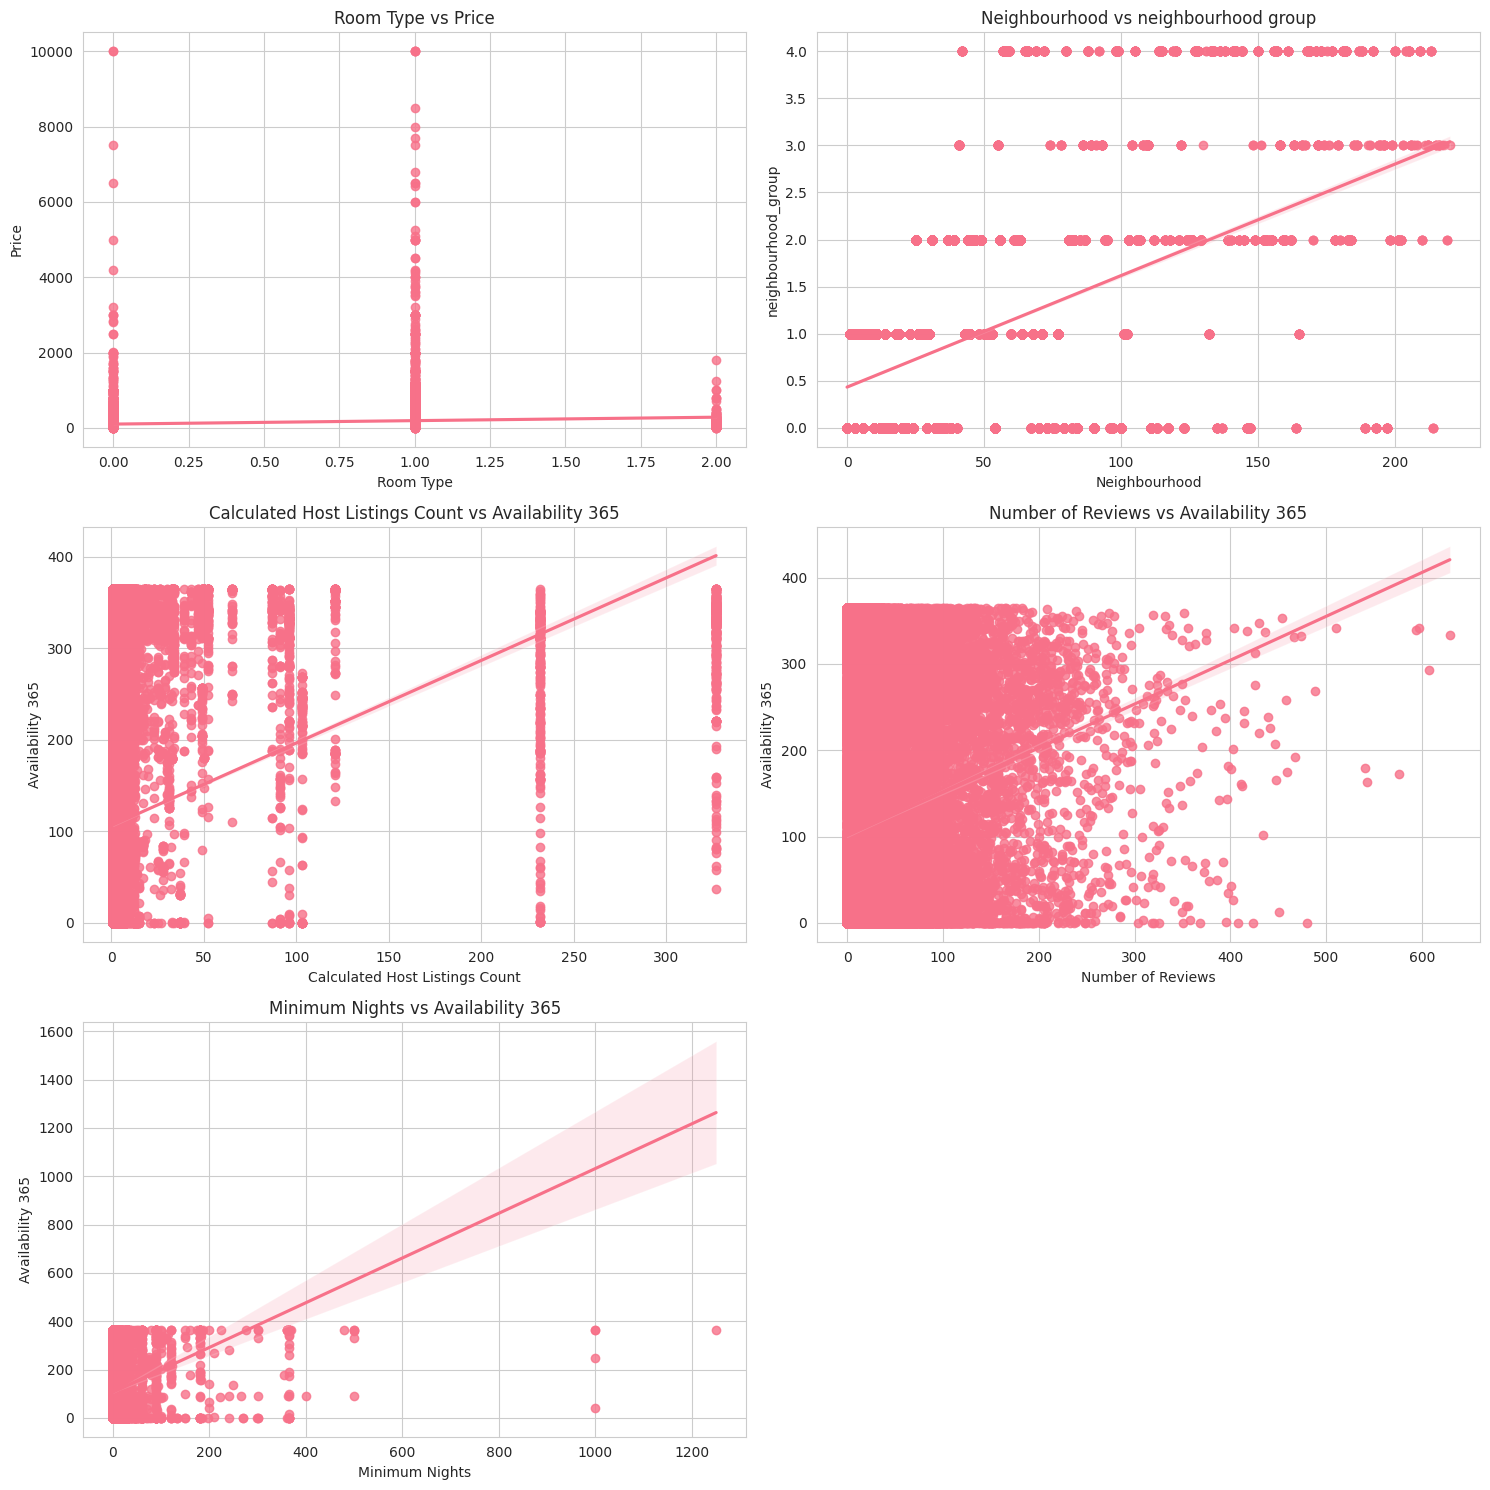

In [37]:
fig, axis = plt.subplots(3, 2, figsize=(15, 15))

# Ajustes estéticos de los subplots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Subplots
sns.regplot(ax=axis[0,0], data=dataframe, x="room_type", y="price")
sns.regplot(ax=axis[0,1], data=dataframe, x="neighbourhood", y="neighbourhood_group")  # Corregí el eje Y
sns.regplot(ax=axis[1,0], data=dataframe, x="calculated_host_listings_count", y="availability_365")
sns.regplot(ax=axis[1,1], data=dataframe, x="number_of_reviews", y="availability_365")  # Corregí el eje X
sns.regplot(ax=axis[2,0], data=dataframe, x="minimum_nights", y="availability_365")


# Títulos y etiquetas
axis[0,0].set_title('Room Type vs Price')
axis[0,0].set_xlabel('Room Type')
axis[0,0].set_ylabel('Price')
axis[0,1].set_title('Neighbourhood vs neighbourhood group')
axis[0,1].set_xlabel('Neighbourhood')
axis[0,1].set_ylabel('neighbourhood_group')
axis[1,0].set_title('Calculated Host Listings Count vs Availability 365')
axis[1,0].set_xlabel('Calculated Host Listings Count')
axis[1,0].set_ylabel('Availability 365')
axis[1,1].set_title('Number of Reviews vs Availability 365')
axis[1,1].set_xlabel('Number of Reviews')
axis[1,1].set_ylabel('Availability 365')
axis[2,0].set_title('Minimum Nights vs Availability 365')
axis[2,0].set_xlabel('Minimum Nights')
axis[2,0].set_ylabel('Availability 365')

# Eliminar las subtramas vacías
fig.delaxes(axis[2, 1])

plt.tight_layout()
plt.show()


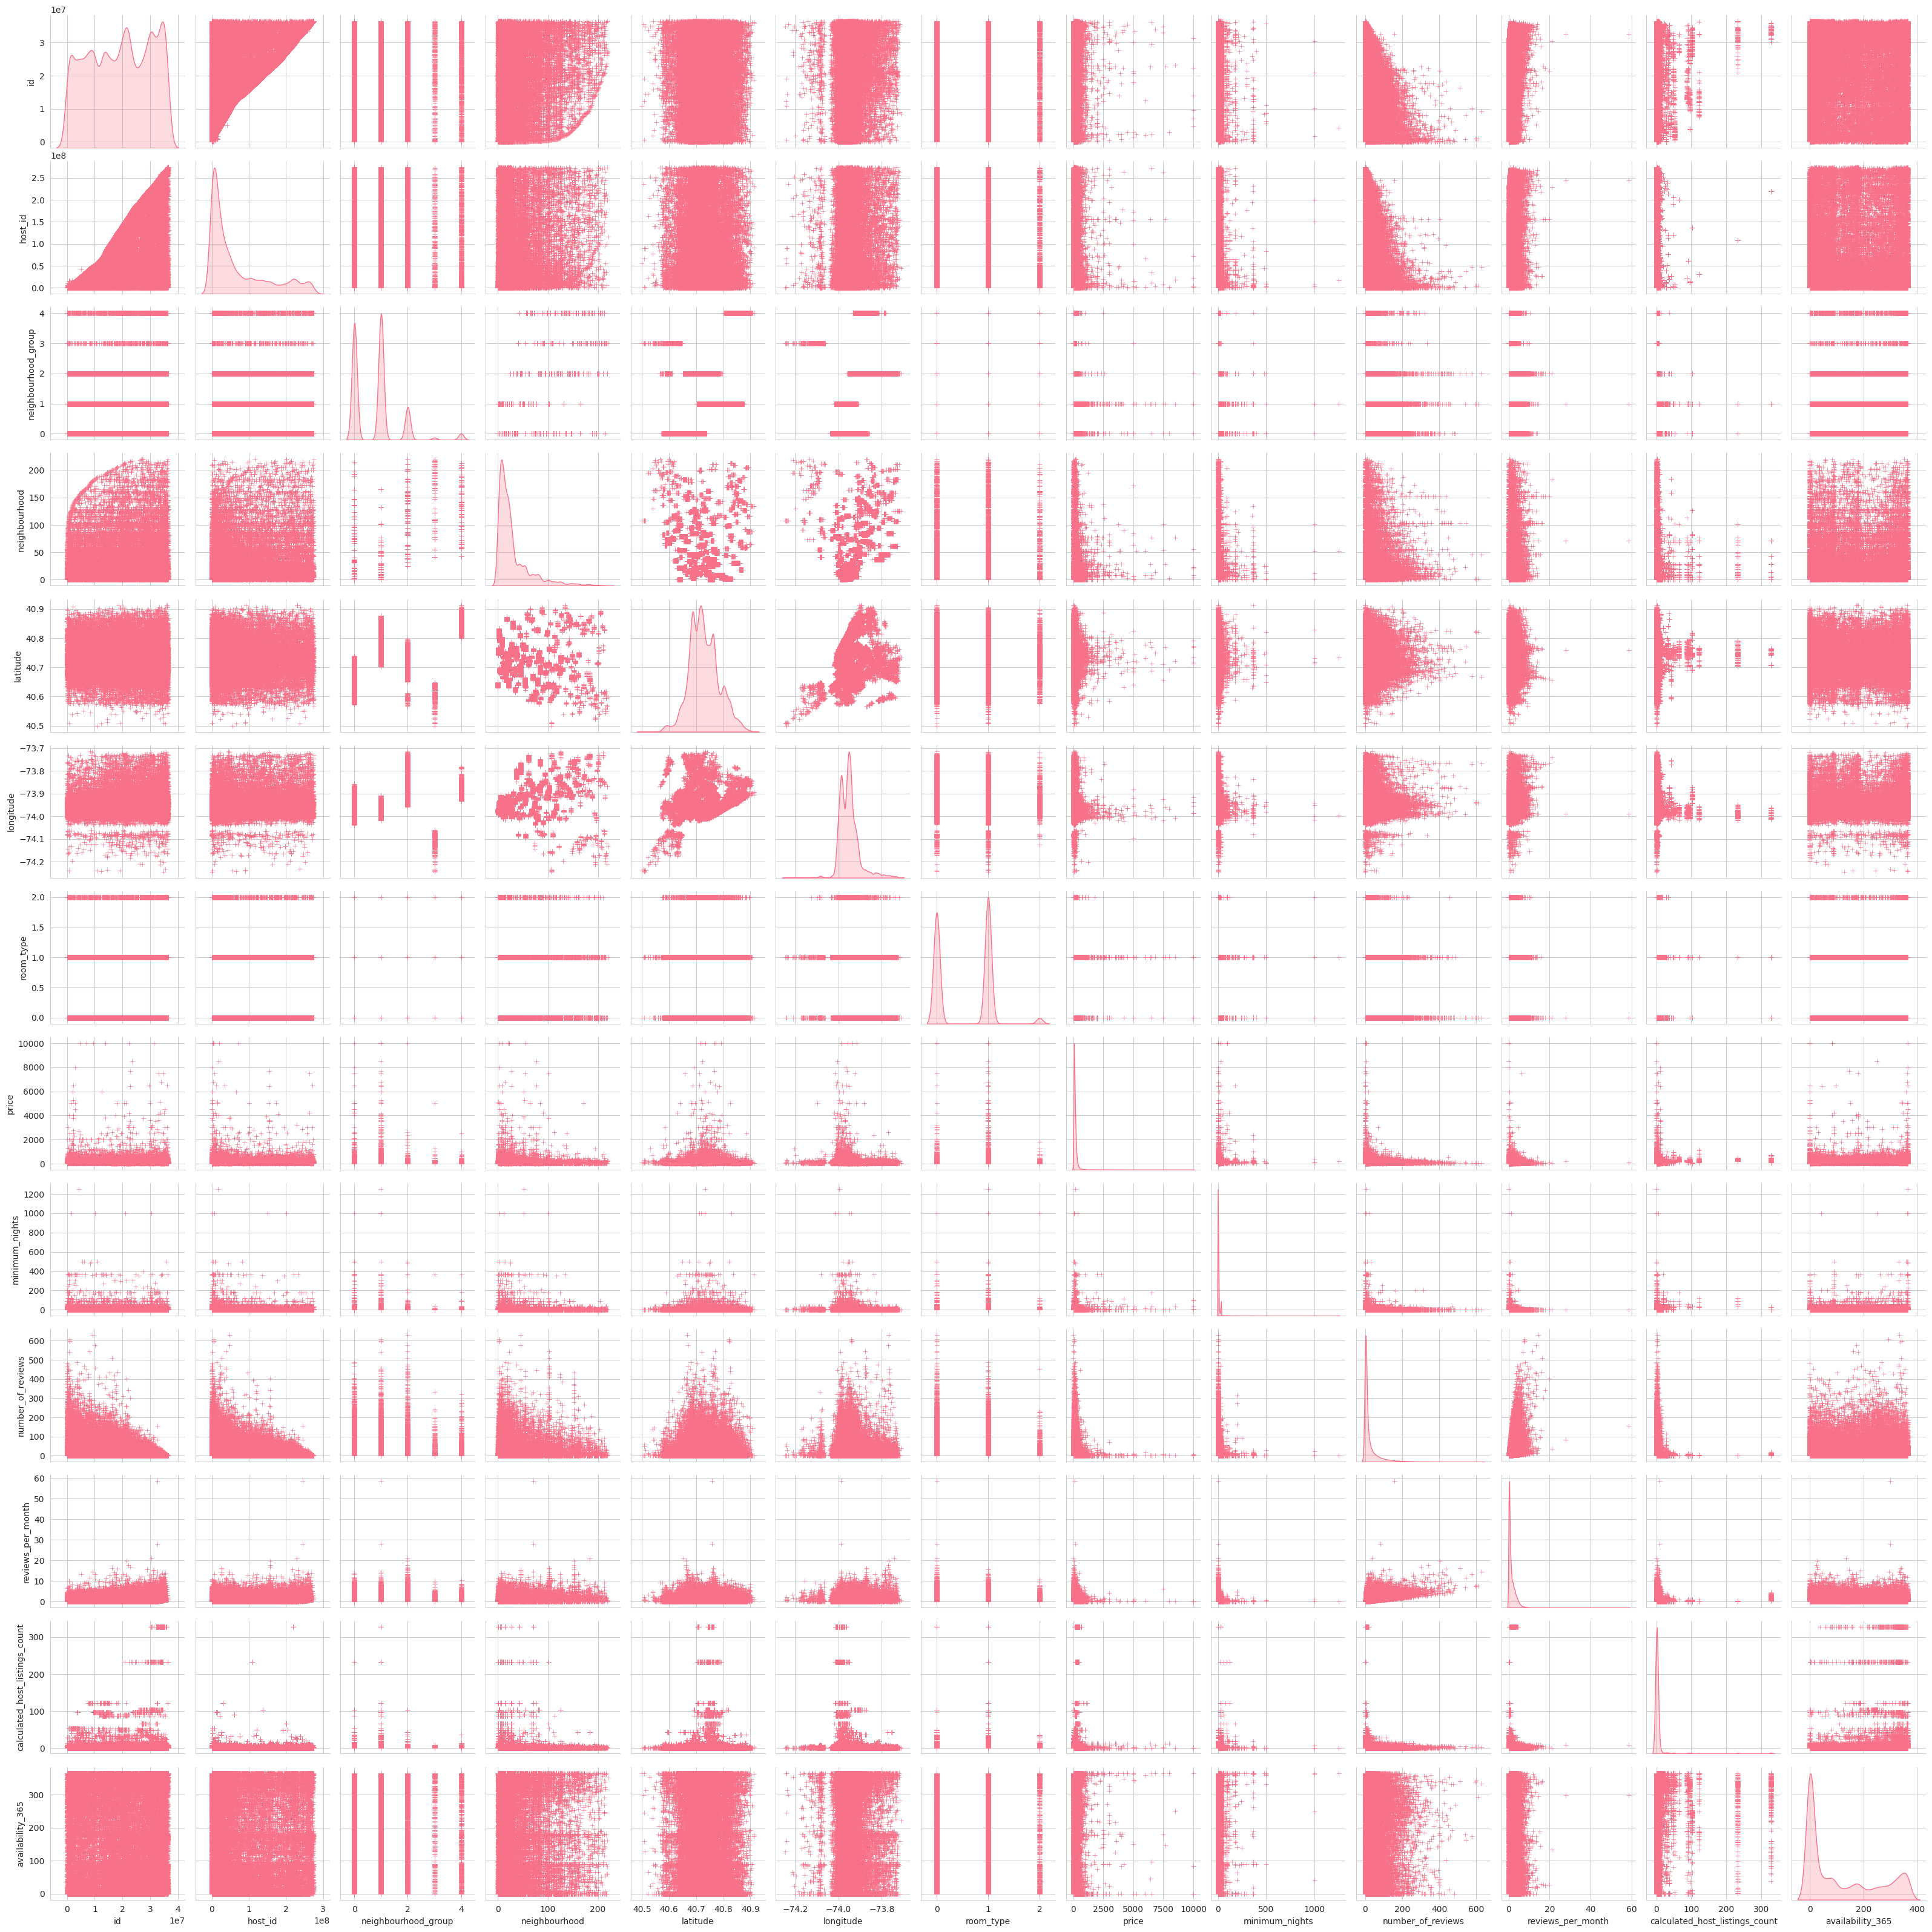

In [38]:
# Configuración de estilo y paleta de colores
sns.set_style("whitegrid")
sns.set_palette("husl")

# Crear el pairplot con algunas opciones adicionales
sns.pairplot(data=dataframe, diag_kind='kde', markers='+')

# Mostrar el gráfico
plt.show()

*Ingenieria de caracteristicas*

In [ ]:
dataframe.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


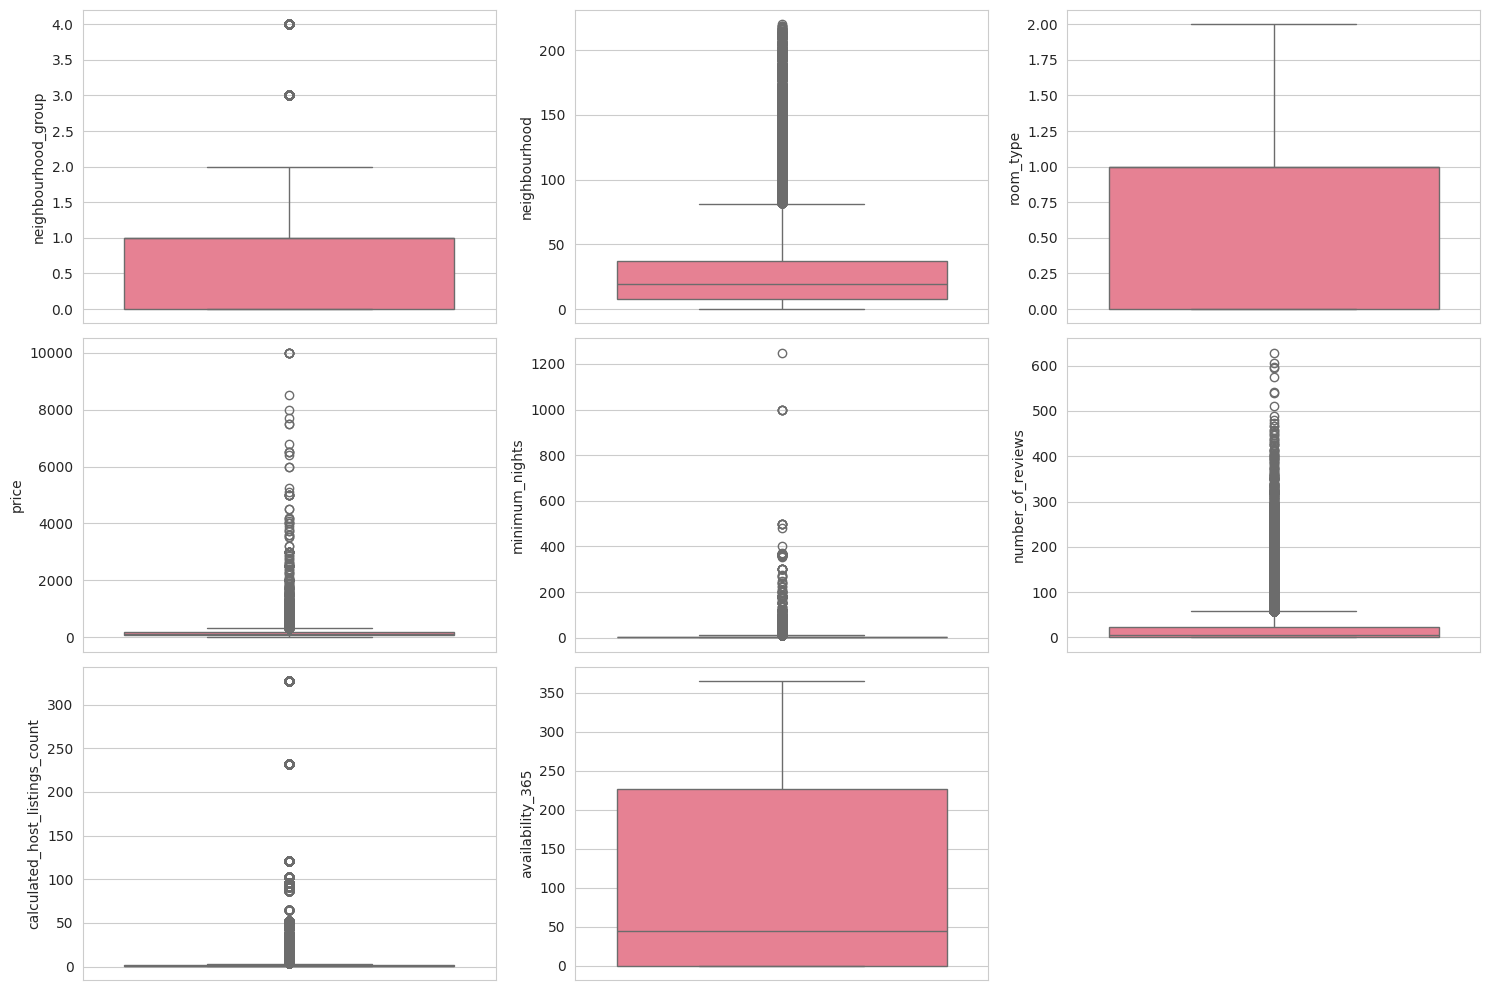

In [ ]:
# Crear la figura y los ejes de las subtramas
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

# Graficar cada boxplot en su subtrama correspondiente
sns.boxplot(ax=axis[0, 0], data=dataframe, y='neighbourhood_group')
sns.boxplot(ax=axis[0, 1], data=dataframe, y='neighbourhood')
sns.boxplot(ax=axis[0, 2], data=dataframe, y='room_type')
sns.boxplot(ax=axis[1, 0], data=dataframe, y='price')
sns.boxplot(ax=axis[1, 1], data=dataframe, y='minimum_nights')
sns.boxplot(ax=axis[1, 2], data=dataframe, y='number_of_reviews')
sns.boxplot(ax=axis[2, 0], data=dataframe, y='calculated_host_listings_count')
sns.boxplot(ax=axis[2, 1], data=dataframe, y='availability_365')

# Eliminar las subtramas vacías
fig.delaxes(axis[2, 2])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

*Revision de datos datos atipicos*

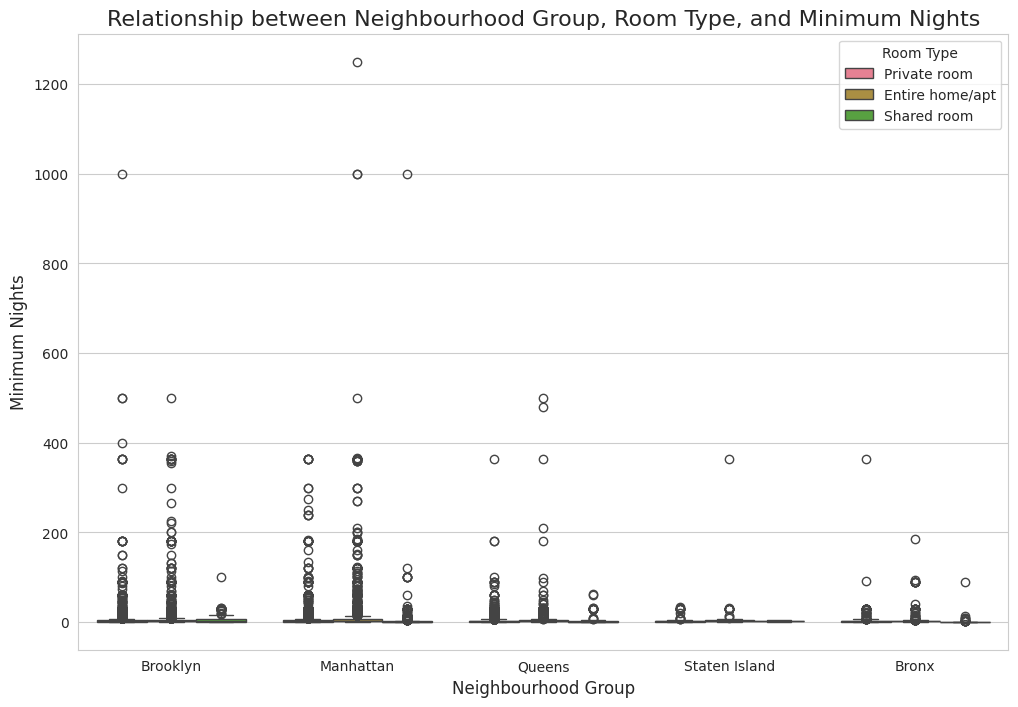

In [39]:
plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.boxplot(data=dataframe2, x='neighbourhood_group', y='minimum_nights', hue='room_type')
plt.xlabel('Neighbourhood Group', fontsize=12)  # Etiqueta para el eje x
plt.ylabel('Minimum Nights', fontsize=12)  # Etiqueta para el eje y
plt.title('Relationship between Neighbourhood Group, Room Type, and Minimum Nights', fontsize=16)  # Título
plt.legend(title='Room Type', loc='upper right')  # Alinear la leyenda a la derecha
plt.show()

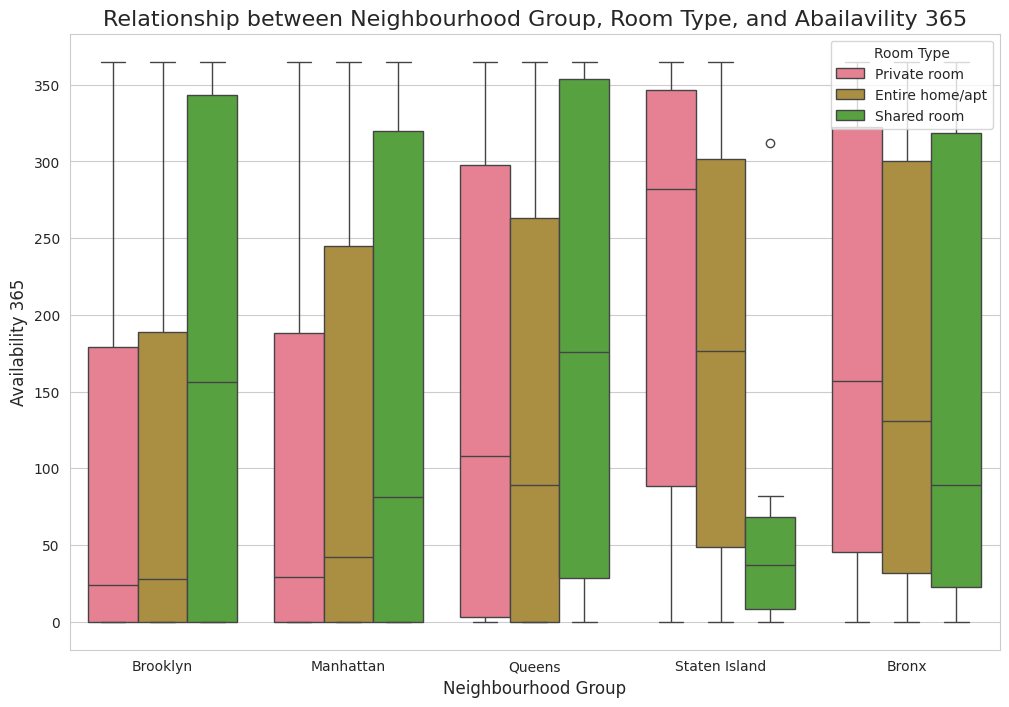

In [40]:
plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.boxplot(data=dataframe2, x='neighbourhood_group', y='availability_365', hue='room_type')
plt.xlabel('Neighbourhood Group', fontsize=12)  # Etiqueta para el eje x
plt.ylabel('Availability 365', fontsize=12)  # Etiqueta para el eje y
plt.title('Relationship between Neighbourhood Group, Room Type, and Abailavility 365', fontsize=16)  # Título
plt.legend(title='Room Type', loc='upper right')  # Alinear la leyenda a la derecha
plt.show()

En el previo Boxplot realizado pudimos observar los datos atipicos de cada una de las variables, de las cuales las dos que me llamaron mas la atencion fueron las de availability_365 y minimum_nights, la primera por la gran cantidad de Abnb con 0 dias disponibles en el año como ya habiamos visto con anterioridad y la segunda por la exigencia de minimo de dias por arriba de los 1200 dias en algunos casos, haciendo un analisis mas de cerca de estas variables pudimos observar que en el caso de la variable availability_365 si la analizamos con el type_room y neighbourhood_group, los casos en los que la disponibilidad es 0 los encontramos en los neighbourhoods de mayor oferta/demanda, incluso se presenta en los tres tipos de habitacion para Brooklyn y Manhattan; En el caso de la variable minimum_nights al realizar el mismo analisis observe que los datos atipicos son persistentes co varios valores arriba de 400 dias en cuarto privado y en casa completa pero me llamo la atencion que inclusive cuarto compartido en Manhattan se presenta por alrededor de 1000 dias, podria ser considerado como si fuera un tipo leasing del Abnb pero al ser mayores de un año para este caso lo tomare como outliers.

In [41]:
minimum_nights_stats=dataframe['minimum_nights'].describe()
minimum_nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Al ejecutar la funcion .describe() para la variable minimum_nights podemos observar una mean de 7.02 pero un valor de 50% de 3, un 25% y min de 1, y un 75% de 5 pero un max de 1250% que refuerza la teoria de los outliers en esta variable.

In [42]:
minimum_nights_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_limit = minimum_nights_stats["75%"] + 1.5 * minimum_nights_iqr
lower_limit = minimum_nights_stats["25%"] - 1.5 * minimum_nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(minimum_nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


Basado en este analisis vemos que deberiamos excluir los valores mayores a 11, pero en este caso, adentrandose un poco mas a lo que viene siendo el negocio y el analisis solicitado, podriamos hacer el analisis intempretando que nuestros valores mas extremos son aquellos mayres a un año natural es decir 365 dias.

In [43]:
dataframe[dataframe["minimum_nights"] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,0,21,40.70202,-73.92402,1,115,370,6,2018-04-15,0.09,1,365
2854,1615764,NaN,6676776,Peter,1,101,40.71239,-74.01620,1,400,1000,0,NaN,NaN,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,1,52,40.73293,-73.99782,1,180,1250,2,2014-11-09,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,2,25,40.75104,-73.93863,1,134,500,30,2018-06-24,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,1,2,40.82135,-73.95521,1,75,500,0,NaN,NaN,1,362
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,2,25,40.74654,-73.95778,1,199,480,0,NaN,NaN,1,365
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,0,15,40.67255,-73.94914,0,50,500,10,2016-09-22,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,1,2,40.82915,-73.94034,1,99,999,2,2018-01-04,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,0,0,40.64779,-73.97956,0,45,500,0,NaN,NaN,1,358
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,1,1,40.74513,-73.98475,1,250,366,0,NaN,NaN,1,365


In [44]:

cont_mn = dataframe["minimum_nights"].gt(365).sum()
cont_mn

14

Siguiendo con el analisis se detecto 14 outliers, al estar analizando un periodo de un año, procederemos a descartar estos outliers

In [45]:
dataframe=dataframe[dataframe["minimum_nights"] <= 365]

*Analisis de valores faltantes*

In [46]:
dataframe.isnull().sum().sort_values(ascending=False)

last_review                       10044
reviews_per_month                 10044
host_name                            21
name                                 15
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

No se encontraron datos faltantes.

In [47]:
dataframe.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split

num_variables=['neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']

X = dataframe.drop(['price'], axis = 1)[num_variables]
y = dataframe['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
X_train.head()


(39104, 7)


,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
31361,1,2,1,3,38,3,302
19903,0,21,0,4,4,1,0
25871,1,1,0,1,33,1,0
23358,1,7,1,2,6,1,0
17618,1,2,1,7,9,1,27


*Normalization*

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
31361,0.260349,-0.803643,0.801421,-0.232320,0.327710,-0.127293,1.438672
19903,-0.930794,-0.253223,-1.050204,-0.172404,-0.431838,-0.186963,-0.857838
25871,0.260349,-0.832613,-1.050204,-0.352153,0.216011,-0.186963,-0.857838
23358,0.260349,-0.658796,0.801421,-0.292237,-0.387159,-0.186963,-0.857838
17618,0.260349,-0.803643,0.801421,0.007346,-0.320140,-0.186963,-0.652521


*MinMax sacaler*

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
31361,0.25,0.009091,0.5,0.005495,0.060413,0.006135,0.827397
19903,0.00,0.095455,0.0,0.008242,0.006359,0.000000,0.000000
25871,0.25,0.004545,0.0,0.000000,0.052464,0.000000,0.000000
23358,0.25,0.031818,0.5,0.002747,0.009539,0.000000,0.000000
17618,0.25,0.009091,0.5,0.016484,0.014308,0.000000,0.073973


*Feature selection*

In [51]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,2,1,3,3,302
1,21,0,4,1,0
2,1,0,1,1,0
3,7,1,2,1,0
4,2,1,7,1,27


In [52]:
X_test_sel.head()

,neighbourhood,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,25,0,3,1,0
1,12,1,2,1,184
2,56,0,1,3,89
3,6,1,3,1,216
4,7,0,4,3,73


In [53]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [55]:
X_train_sel.to_csv("X_train_processed.csv",index=False)
X_test_sel.to_csv("X_test_procesed.csv",index=False)

In [56]:
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

OSError: Cannot save file into a non-existent directory: '../data/processed'